# Kernel Estimation routine

In [1]:
import sys
sys.path.append("..")

import src.uilc as uilc
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def gaussian(xline, position, weight, h):
    y = np.zeros(xline.size)
    for i, pos in enumerate(position):
        y += weight[i]* np.exp(-np.power(xline-pos,2)/(2*h**2))
    return y

## Inital test

In [3]:
s = 30
W = 0.09
H = 0.03

In [5]:
ds_rho, ds_position, ds_F = uilc.DISOP.solve_linear(s, W, H)
normalziation_value = 1
ds_rho = (normalziation_value/(W*ds_rho.sum())) * ds_rho


In [6]:
nnls_n = 1000
nnls_rho1, nnls_position1, nnls_F = uilc.DISOP.solve_nnls(s, W, H, n_nnls = nnls_n)
nnls_rho1 = (normalziation_value/(W*nnls_rho1.sum())) * nnls_rho1
nnls_n = 500
nnls_rho2, nnls_position2, nnls_F = uilc.DISOP.solve_nnls(s, W, H, n_nnls = nnls_n)
nnls_rho2 = (normalziation_value/(W*nnls_rho2.sum())) * nnls_rho2
nnls_n = 200
nnls_rho3, nnls_position3, nnls_F3 = uilc.DISOP.solve_nnls(s, W, H, n_nnls = nnls_n)
nnls_rho3 = (normalziation_value/(W*nnls_rho3.sum())) * nnls_rho3


In [7]:
nnls_n = 1500
nnls_rho8, nnls_position8, nnls_F = uilc.DISOP.solve_system(s, W, H, n_nnls = nnls_n, method="nnls")
nnls_rho8 = (nnls_rho8.shape[0]/(W*nnls_rho8.sum())) * nnls_rho8

AttributeError: type object 'DISOP' has no attribute 'solve_system'

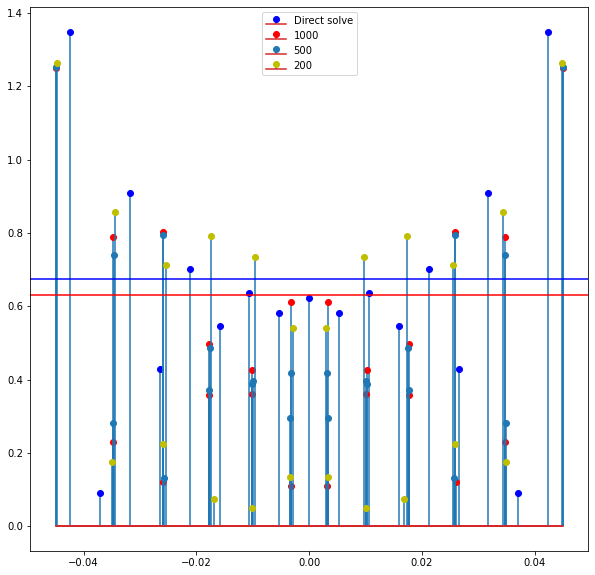

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker1, stemlines1, baseline1 = ax.stem(ds_position, ds_rho, label="Direct solve")
marker2, stemlines2, baseline2 = ax.stem(nnls_position1, nnls_rho1, label="1000")
marker3, stemlines3, baseline3 = ax.stem(nnls_position2, nnls_rho2, label="500")
marker4, stemlines4, baseline4 = ax.stem(nnls_position3, nnls_rho3, label="200")
#ax.plot(nnls_position3, nnls_F3.dot(rho))
#marker8, stemlines8, baseline4 = ax.stem(nnls_position8, nnls_rho8, label="{}".format(nnls_n))

marker1.set_color("b")
marker2.set_color("r")
#marker3.set_color("c")
marker4.set_color("y")
plt.axhline(y= nnls_rho3[0]/2, color="red")
plt.axhline(y= ds_rho[0]/2, color="blue")
plt.legend()
plt.show()

In [44]:
nnls_n = 20
nnls_rho, nnls_position, nnls_F = uilc.DISOP.solve_nnls(s, W, H, n_nnls = nnls_n, mean= False)
nnls_rho = (1/(W*nnls_rho.sum())) * nnls_rho

In [45]:
nnls_rho.shape

(20,)

In [46]:
nnls_F.shape

(20, 20)

In [47]:
ds_rho, ds_position, ds_F = uilc.DISOP.solve_linear(s, W, H,  n_pre = 20)
normalziation_value = 1
ds_rho = (normalziation_value/(W*ds_rho.sum())) * ds_rho


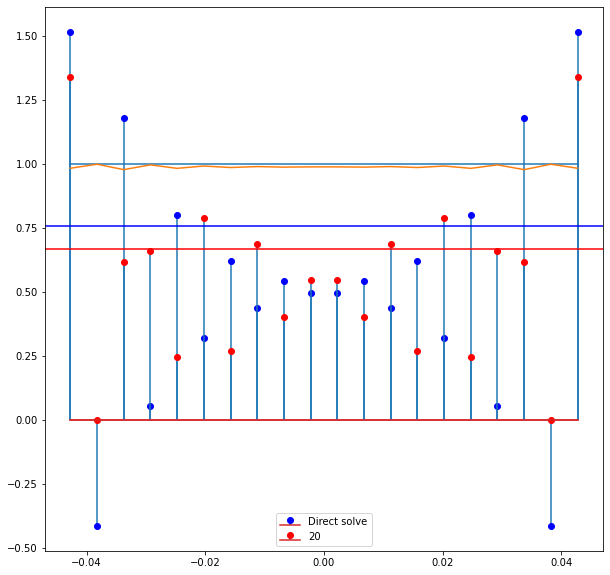

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker1, stemlines1, baseline1 = ax.stem(ds_position, ds_rho, label="Direct solve")
marker2, stemlines2, baseline2 = ax.stem(nnls_position, nnls_rho, label=f"{nnls_n}")
#ax.plot(nnls_position3, nnls_F3.dot(rho))
#marker8, stemlines8, baseline4 = ax.stem(nnls_position8, nnls_rho8, label="{}".format(nnls_n))

marker1.set_color("b")
marker2.set_color("r")
#marker3.set_color("c")

ds =ds_F.dot(ds_rho)
ds= ds/ds.max()
ax.plot(ds_position, ds)

nnls = nnls_F.dot(nnls_rho)
nnls = nnls/nnls.max()
ax.plot(nnls_position, nnls)
plt.axhline(y= nnls_rho[0]/2, color="red")
plt.axhline(y= ds_rho[0]/2, color="blue")
plt.legend()
plt.show()

In [8]:
from scipy.interpolate import interp1d

In [9]:
cu2 = interp1d(ds_position, ds_rho, kind='cubic', fill_value="extrapolate")

In [10]:
xew = np.linspace(-(W/2-0.0031), (W/2-0.0028), num= 100, endpoint=False)

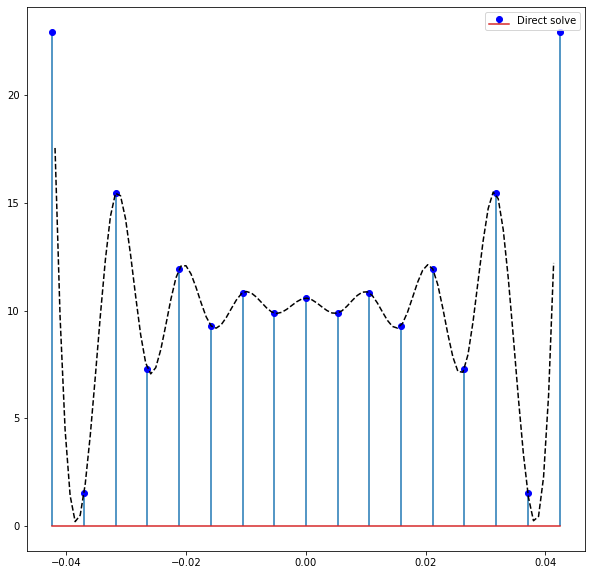

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker1, stemlines1, baseline1 = ax.stem(ds_position, ds_rho, label="Direct solve")
marker1.set_color("b")

ax.plot(xew, cu2(xew), '--', color='black')
plt.legend()
plt.show()

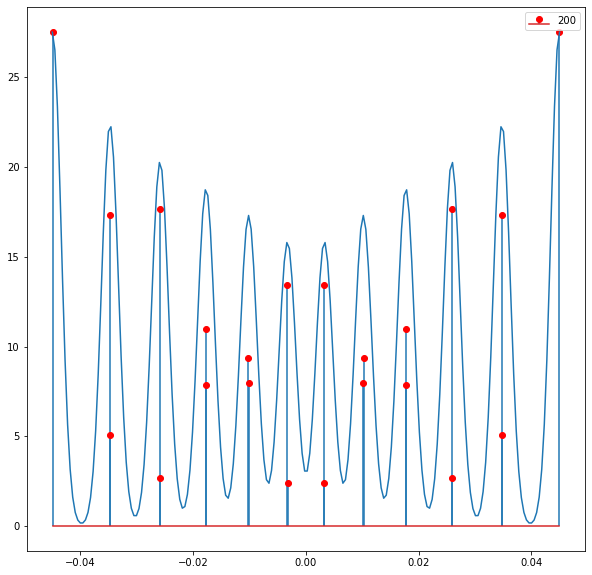

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker1, stemlines1, baseline1 = ax.stem(nnls_position1, nnls_rho1, label="200")
marker1.set_color("r")
xline1 = np.linspace(-W/2, W/2, 200)
y1 = gaussian(xline1, nnls_position1, nnls_rho1, W/60)

ax.plot(xline1, y1)
plt.legend()
plt.show()

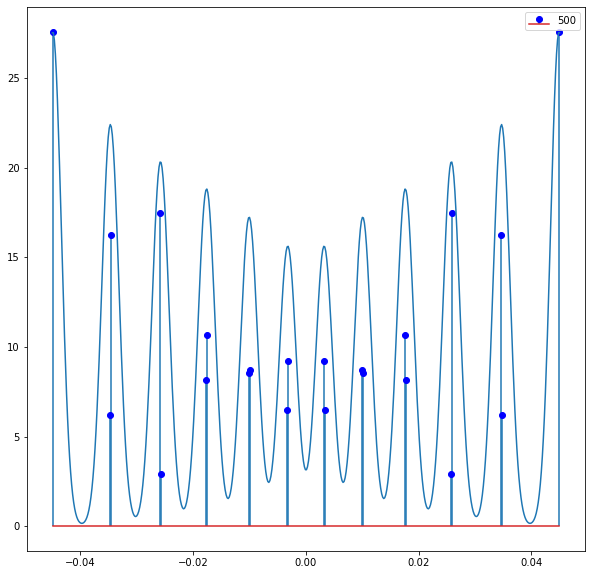

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker2, stemlines2, baseline2 = ax.stem(nnls_position2, nnls_rho2, label="500")
marker2.set_color("b")
xline2 = np.linspace(-W/2, W/2, 500)
y2 = gaussian(xline2, nnls_position2, nnls_rho2, W/60)

ax.plot(xline2, y2)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


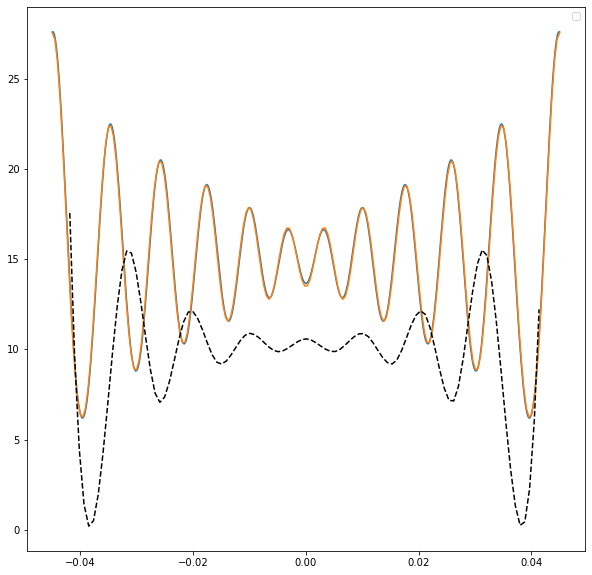

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
h =W/36
xline1 = np.linspace(-W/2, W/2, 200)
y1 = gaussian(xline1, nnls_position1, nnls_rho1, h)
xline2 = np.linspace(-W/2, W/2, 500)
y2 = gaussian(xline2, nnls_position2, nnls_rho2, h)

ax.plot(xline2, y2, xline1, y1)

ax.plot(xew,cu2(xew), '--', color='black')
plt.legend()
plt.show()


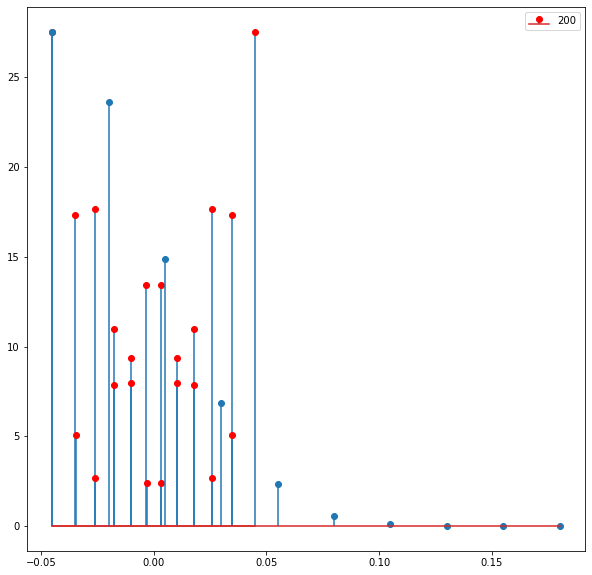

In [45]:
i = 0
rho =nnls_rho1[i]
pos = nnls_position1[i]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

xline= np.linspace(-W/2, 2*W, 10)
h = W/2
y = nnls_rho1[0]*np.exp(-np.power(xline-pos,2)/(2*h**2))
marker4, stemlines4, baseline4 = ax.stem(nnls_position1, nnls_rho1, label="200")
marker4.set_color('r')
ax.stem(xline, y)
plt.legend()
plt.show()

In [9]:
dm = 0.0034
x = np.array([-0.02985-dm, -0.02985+dm , -0.01965, -0.01125, -0.00375, 0.00375, 0.01125, 0.01965, 0.02985-dm, 0.02985+dm])
arr = uilc.utils.get_2d_array(np.array([0]), x , dim =0)

In [10]:
# Plot value
xline = np.linspace(-W/2, W/2 , 400)
yline = np.linspace(-W/2, W/2 , 400)
X, Y = np.meshgrid(xline, yline)

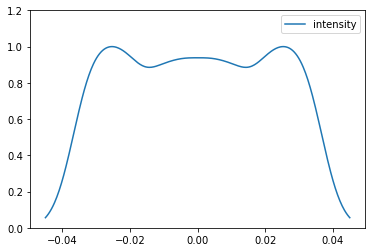

In [11]:
intensity = uilc.utils.lambertian_distribution(xline, np.array([[[0]]]), arr, s, H)
bc_y = intensity[0][0]
bc_y = bc_y/bc_y.max()
plt.plot(xline, bc_y, label="intensity")
plt.ylim(0, 1.2)
plt.legend()
plt.show()

In [12]:
arr

array([[[ 0.03325,  0.     ],
        [ 0.02645,  0.     ],
        [ 0.01965,  0.     ],
        [ 0.01125,  0.     ],
        [ 0.00375,  0.     ],
        [-0.00375,  0.     ],
        [-0.01125,  0.     ],
        [-0.01965,  0.     ],
        [-0.02645,  0.     ],
        [-0.03325,  0.     ]]])

In [13]:
j = [2, 4, 6]
n = rho.size

for l in j:
    rho[l] = rho[n-1-l] = 0


NameError: name 'rho' is not defined

In [14]:
rho.size-6-1

NameError: name 'rho' is not defined

In [15]:
ar = [18.0306145 + 10.44938305,
16.72668919+  8.11677247,
12.50188333+ 10.45302511]

In [16]:
i= [1, 3, 5]
for k, l in enumerate(i):
    print(n)
    print(l)
    rho[l] = ar[k]
    rho[n-1-l] = ar[k]

NameError: name 'n' is not defined

In [11]:
ar

[28.47999755, 24.84346166, 22.95490844]

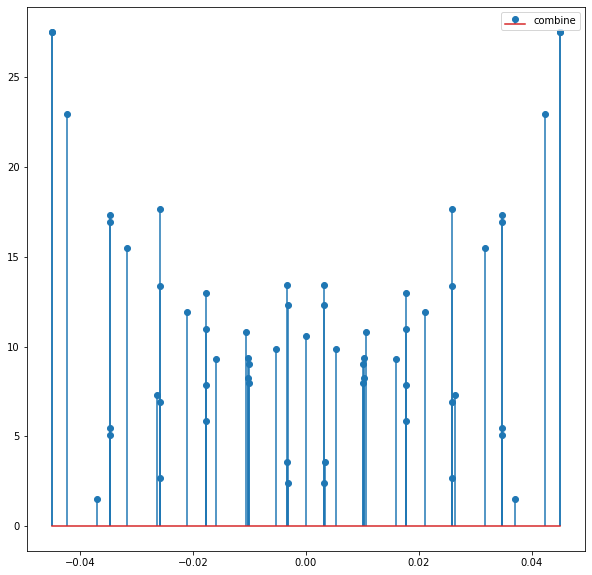

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

pos = np.concatenate((ds_position, nnls_position1, nnls_position8))
y = np.concatenate((ds_rho, nnls_rho1,nnls_rho8))
#ax.plot(ds_position, ds_rho, label="Direct solve")
ax.stem(pos, y, label="combine")

plt.legend()
plt.show()

In [20]:
np.concatenate((ds_rho, nnls_rho1,nnls_rho8))

array([69.94516623,  1.82114951, 48.74746596, 19.7336525 , 36.92834229,
       27.0483871 , 32.38708388, 30.05541921, 30.05541921, 32.38708388,
       27.0483871 , 36.92834229, 19.7336525 , 48.74746596,  1.82114951,
       69.94516623, 54.99217523, 34.66584443, 41.79810161, 30.17159045,
       23.84320489, 14.52908333, 14.52908359, 23.84320473, 30.17159049,
       41.79810161, 34.66584443, 54.99217523, 52.75415285, 42.89569151,
       38.37952541, 26.63810771, 25.53491222, 13.79761033, 13.7976102 ,
       25.53491231, 26.63810769, 38.37952541, 42.89569151, 52.75415285])